In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
a = np.array([[1,2],[3,4],[5,6]])
a

array([[1, 2],
       [3, 4],
       [5, 6]])

In [4]:
scaled = a - np.mean(a,0)

In [5]:
scaled

array([[-2., -2.],
       [ 0.,  0.],
       [ 2.,  2.]])

In [6]:
c = np.cov(scaled.T)
c

array([[4., 4.],
       [4., 4.]])

In [7]:
eigval, eigvect = np.linalg.eig(c)

In [8]:
# we had 1,1,1,-1 in book calculation , here it is 0.707... this is because of ORTHO-NORMALISATION

In [9]:
pc = scaled.dot(eigvect)
pc

array([[-2.82842712,  0.        ],
       [ 0.        ,  0.        ],
       [ 2.82842712,  0.        ]])

In [10]:
# eigval

# PCI With IRIS Dataset

In [11]:
import seaborn as sns

In [12]:
df = sns.load_dataset('iris')
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [13]:
x = df.drop('species', 1)

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
sc = StandardScaler()
x_sc = sc.fit_transform(x)

In [16]:
c = np.cov(x_sc.T)
c

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [17]:
eigval, eigvect = np.linalg.eig(c)

In [18]:
eigval

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [19]:
#eigval already sorted, genereally we need to sort

In [20]:
var_exp = eigval/sum(eigval) * 100
var_exp

array([72.96244541, 22.85076179,  3.66892189,  0.51787091])

In [21]:
pc = x_sc.dot(eigvect)

In [22]:
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 72.96244541,  95.8132072 ,  99.48212909, 100.        ])

## Scree Plot

In [23]:
import matplotlib.pyplot as plt

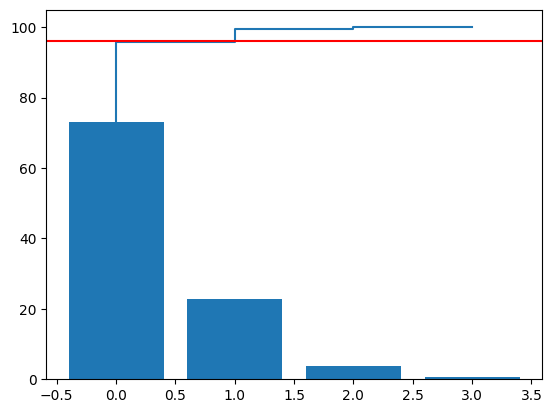

In [24]:
plt.bar(range(4), var_exp)
plt.step(range(4), cum_var_exp)
plt.axhline(96, c = 'red')
plt.show()

In [25]:
from sklearn.decomposition import PCA

In [47]:
# another way of creating PC
# earlier we did by pc = scaled.dot(eigvect)

my_pca = PCA(n_components=2)
pca2 = my_pca.fit_transform(x_sc)
pca_df = pd.DataFrame(pca2)
pca_df.head()

,0,1
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


### Now we need to build model using these 2 feautres

In [27]:
my_pca.explained_variance_
# this is eigenvalue

array([2.93808505, 0.9201649 ])

In [28]:
my_pca.explained_variance_ratio_
#percentage

array([0.72962445, 0.22850762])

### Kaiser's criterion suggests that you should only keep the factors that have eigenvalues greater than one, and discard the rest. This means that you are only retaining the factors that explain more variance than a single variable would on its own.

# LDA (Linear Discrimination Analysis)

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [30]:
y = df['species']

In [31]:
mylda = LDA()
lda_model = mylda.fit(x_sc, y)

In [32]:
lda_model.explained_variance_ratio_
# eigen value percentage

array([0.9912126, 0.0087874])

In [33]:
# now passing ncomponent = 1

In [34]:
mylda = LDA(n_components=1)
lda_model = mylda.fit(x_sc, y)
lda_model.explained_variance_ratio_

array([0.9912126])

### Train test split

In [35]:
y = df['species']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
xtrain,xtest, ytrain,ytest = train_test_split(x_sc,y, test_size=0.2, random_state=87)

In [38]:
mylda = LDA(n_components=1)
lda_model = mylda.fit(x_sc, y)
lda_model.explained_variance_ratio_

array([0.9912126])

In [39]:
ypred = lda_model.predict(xtest)

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
accuracy_score(ypred, ytest)

0.9666666666666667

In [42]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [43]:
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64